# Heart Failure Prediction

### Data Preprocessing

As the prior step before creation & taring of ml model, this notebook covers the following data preprocessing steps:

* Data Cleaning: Handle missing and null values, remove duplicates, and correct errors.
* Data Transformation: Normalize or standardize data, encode categorical variables, and perform feature scaling.
* Exploratory Data Analysis (EDA): Analyze the data to understand its structure, distribution, and relationships between variables.
* Feature Engineering: Create new features or modify existing ones to improve the model's performance.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

#### 1. Load Data

In [2]:
# Loading data to dataframe

df = pd.read_csv("../data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### 2. Check anomalies in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Check for Missing Values:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Checking for duplicates

df.duplicated().sum()

np.int64(0)

In [7]:
# Unique values in each column

for i in df.columns:
    print(i, df[i].nunique())

Age 50
Sex 2
ChestPainType 4
RestingBP 67
Cholesterol 222
FastingBS 2
RestingECG 3
MaxHR 119
ExerciseAngina 2
Oldpeak 53
ST_Slope 3
HeartDisease 2


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From dataset description, we can see that:

The shape of the dataset is (918, 12).

There are no missing values.

The object values (Sex, CjestPainType, RestingECG, ExerciseAngina & ST_Slope) in data will be converted into integer.

The minimum value of RestingBP & Cholestrol  '0' seems abnormal. Let's check how many records has 0 value.


In [9]:
# Check for number of rows where RestingBP is 0

print("Number of rows where RestingBP is 0: ", df[df['RestingBP'] == 0].shape[0])
print("Percentage of rows where RestingBP is 0: ", round(df[df['RestingBP'] == 0].shape[0] / df.shape[0] * 100, 2))

# Check for number of rows where Cholesterol is 0

print("Number of rows where Cholesterol is 0: ", df[df['Cholesterol'] == 0].shape[0])
print("Percentage of rows where Cholesterol is 0: ", round(df[df['Cholesterol'] == 0].shape[0] / df.shape[0] * 100, 2))



Number of rows where RestingBP is 0:  1
Percentage of rows where RestingBP is 0:  0.11
Number of rows where Cholesterol is 0:  172
Percentage of rows where Cholesterol is 0:  18.74


#### 3. Data cleaning & Transformation

In [10]:
# Drop the row  where RestingBP is 0

df = df[df['RestingBP'] != 0]

In [11]:
# transform 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina' & 'ST_Slope' with onehot encoding

df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
df_encoded.head()


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,True,True,False,False,False,True,False,False,False,True
1,49,160,180,156,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,130,283,98,0.0,0,True,True,False,False,False,False,True,False,False,True
3,48,138,214,108,1.5,1,False,False,False,False,False,True,False,True,True,False
4,54,150,195,122,0.0,0,True,False,True,False,False,True,False,False,False,True


#### 4. Exploratory Data Analysis


First let's check the number of obesrvations with heart disase.

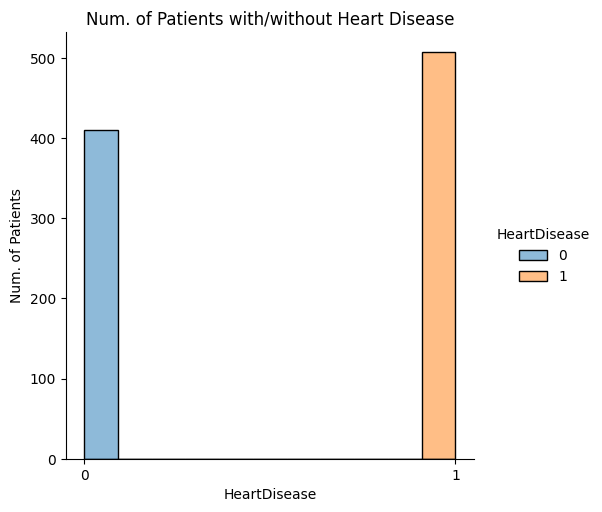

In [12]:
sns.displot(data=df_encoded, x="HeartDisease", hue="HeartDisease", kind="hist")
plt.title(f"Num. of Patients with/without Heart Disease")
plt.xticks(np.arange(0,2))
plt.xlabel("HeartDisease")
plt.ylabel("Num. of Patients")
plt.show()

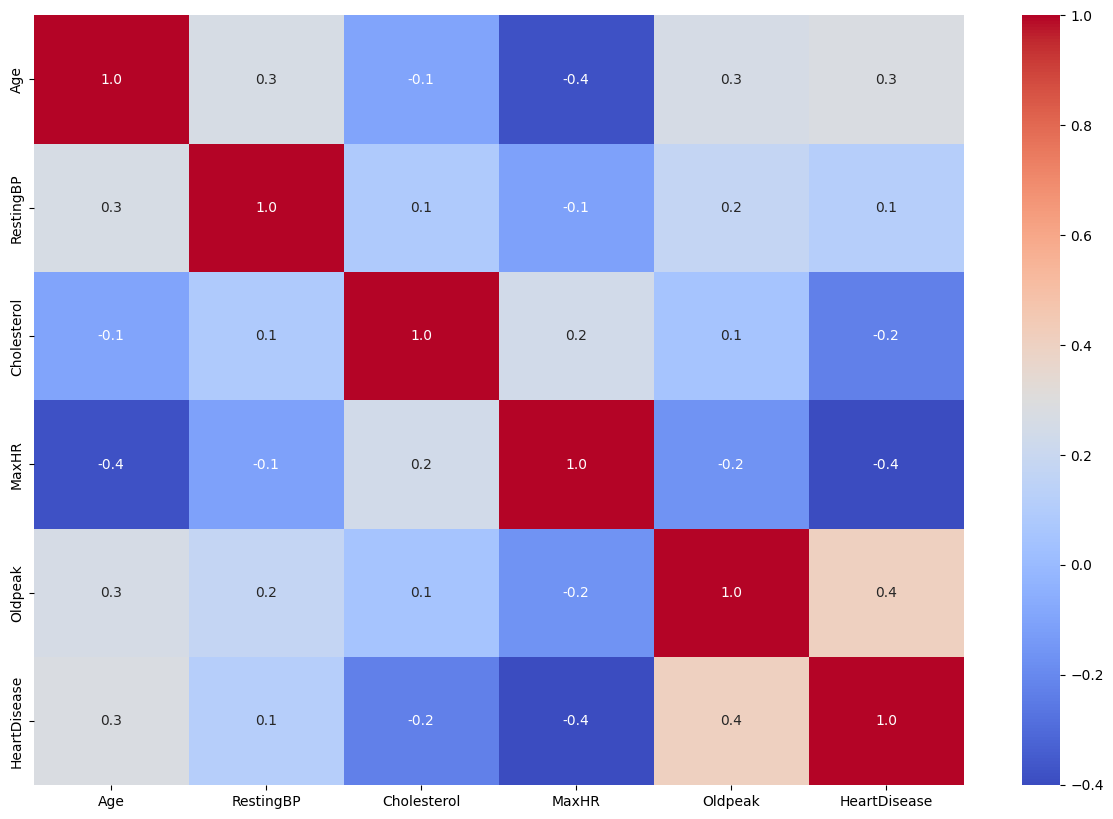

In [28]:
# Look at the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

##### Analyzing non calogerical fetures - Age, RestingBP, Cholesterol, MaxHR & Oldpeak

In [14]:
def plot_histograms(data, suptitle):
    col_list = data.columns.tolist()
    fig, ax = plt.subplots(1, len(col_list), sharey=False, figsize=(len(col_list)*4, 4))
    fig.suptitle(suptitle, fontsize=18, fontweight='bold')
    
    for i, col in enumerate(col_list):
        sns.histplot(data, x=col, multiple="layer", ax=ax[i], legend=None)
        ax[i].set_title(col)
        ax[i].set_xlabel(col) 
        ax[i].set_ylabel(None)
    
    ax[0].set_ylabel("Num. of Patients")
    fig.tight_layout()
    plt.show()

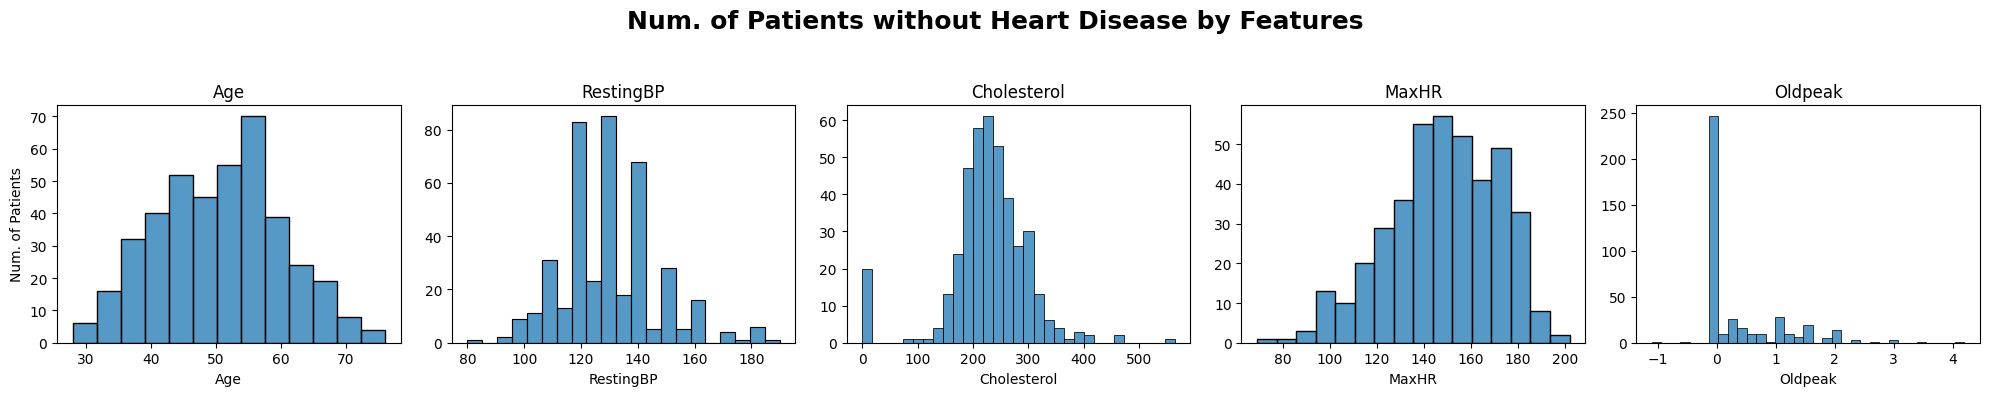

In [15]:
suptitle = "Num. of Patients without Heart Disease by Features\n"

# Filter the DataFrame, drop 'HeartDisease', and select numerical columns
filtered_df = df_encoded[df_encoded["HeartDisease"] == 0].drop(columns=['HeartDisease']).select_dtypes(include=['float64', 'int64'])

# Plot histograms
plot_histograms(filtered_df, suptitle)

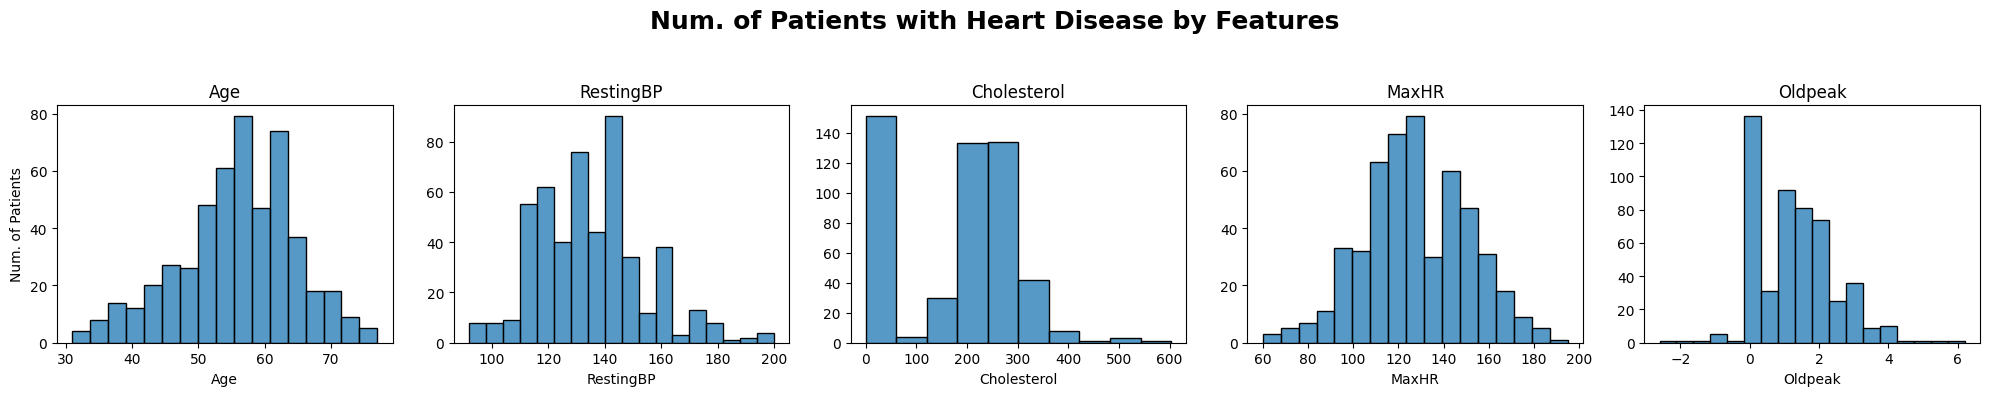

In [16]:
suptitle = "Num. of Patients with Heart Disease by Features\n"

# Filter the DataFrame, drop 'HeartDisease', and select numerical columns
filtered_df = df_encoded[df_encoded["HeartDisease"] == 1].drop(columns=['HeartDisease']).select_dtypes(include=['float64', 'int64'])

# Plot histograms
plot_histograms(filtered_df, suptitle)

##### Analyzing encoded features - Sex, ChestPainType , Fasting Blood Suger, Resting ECG, Exercise Angina, ST_Slop

In [22]:
# Create a deep copy of df_encoded to avoid modifying the original DataFrame
df_analysys = df_encoded.copy()

# Reconstruct 'ChestPainType' from one-hot encoded columns
df_analysys['ChestPainType'] = np.select(
    [
        df_analysys['ChestPainType_ATA'],
        df_analysys['ChestPainType_NAP'],
        df_analysys['ChestPainType_TA']
    ],
    [
        'ATA',
        'NAP',
        'TA'
    ],
    default='ASY'  
)

# Reconstruct 'RestingECG' from one-hot encoded columns
df_analysys['RestingECG'] = np.select(
    [
        df_analysys['RestingECG_Normal'],
        df_analysys['RestingECG_ST']
    ],
    [
        'Normal',
        'ST'
    ],
    default='LVH'  
)

# Reconstruct 'ST_Slope' from one-hot encoded columns
df_analysys['ST_Slope'] = np.select(
    [
        df_analysys['ST_Slope_Flat'],
        df_analysys['ST_Slope_Up']
    ],
    [
        'Flat',
        'Up'
    ],
    default='Down'  
)

# Reconstruct 'Sex' from one-hot encoded columns
df_analysys['Sex'] = np.select(
    [
        df_analysys['Sex_M']
    ],
    [
        'Male'
    ],
    default='Female'
)

# Reconstruct 'ExerciseAngina' from one-hot encoded columns
df_analysys['ExerciseAngina'] = np.select(
    [
        df_analysys['ExerciseAngina_Y']
    ],
    [
        'Yes'
    ],
    default='No'
)

# Reconstruct 'FastingBS' from one-hot encoded columns
df_analysys['FastingBS'] = np.select(
    [
        df_analysys['FastingBS_1']
    ],
    [
        '1'
    ],
    default='0'
)

# Drop Original One-Hot Encoded Columns

df_analysys = df_analysys.drop(columns=[
    'ChestPainType_ATA', 
    'ChestPainType_NAP', 
    'ChestPainType_TA',
    'RestingECG_Normal',
    'RestingECG_ST',
    'ST_Slope_Flat',
    'ST_Slope_Up',
    'Sex_M',
    'ExerciseAngina_Y',
    'FastingBS_1'
])

# Define Encoded and Categorical Columns

encoded_columns = [
    'ChestPainType',
    'RestingECG',
    'ST_Slope',
    'Sex',
    'ExerciseAngina',
    'FastingBS'
]


In [23]:

def plot_patient_counts(df, condition, suptitle):
    filtered_df = df[condition].drop(columns=['HeartDisease'])
    
    # Define Plot Layout
    n_cols = 3  # Number of plots per row
    n_rows = math.ceil(len(encoded_columns) / n_cols)
    
    # Create Subplots
    fig, ax = plt.subplots(n_rows, n_cols, sharey=False, figsize=(n_cols * 5, n_rows * 4))
    fig.suptitle(suptitle, fontsize=16, fontweight='bold')
    
    # Ensure ax is two-dimensional
    if n_rows == 1:
        ax = np.expand_dims(ax, axis=0)
    
    # Plot Countplots
    for i, col in enumerate(encoded_columns):
        row = i // n_cols
        col_idx = i % n_cols
        
        sns.countplot(x=col, data=filtered_df, ax=ax[row][col_idx], hue=col, palette="Set2", legend=False)
        ax[row][col_idx].set_title(col.replace('_', ' '), fontsize=12)
        ax[row][col_idx].set_xlabel(col.replace('_', ' '), fontsize=10)
        ax[row][col_idx].set_ylabel("Count", fontsize=10)
        ax[row][col_idx].tick_params(axis='x', rotation=45)
        
        # Annotate bars with counts
        for p in ax[row][col_idx].patches:
            height = p.get_height()
            ax[row][col_idx].annotate(f'{height}', 
                                       (p.get_x() + p.get_width() / 2., height),
                                       ha='center', va='bottom', fontsize=9, color='black')
    
    # Remove Empty Subplots
    total_plots = n_rows * n_cols
    for j in range(len(encoded_columns), total_plots):
        fig.delaxes(ax.flatten()[j])
    
    if len(encoded_columns) > 0:
        ax.flatten()[0].set_ylabel("Count", fontsize=10)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



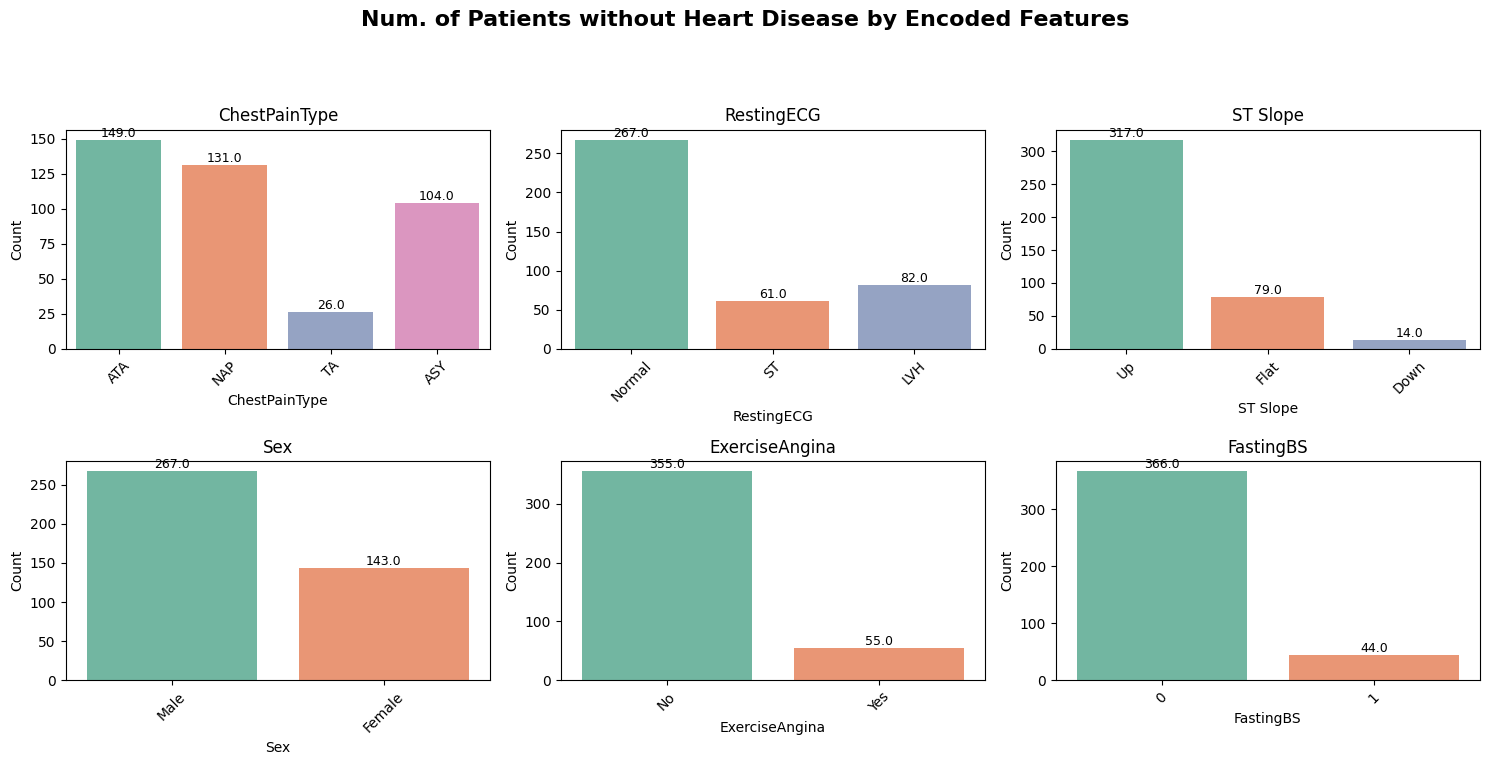

In [24]:
# Plot for patients without heart disease
plot_patient_counts(
    df_analysys, 
    df_analysys["HeartDisease"] == 0, 
    "Num. of Patients without Heart Disease by Encoded Features\n"
)



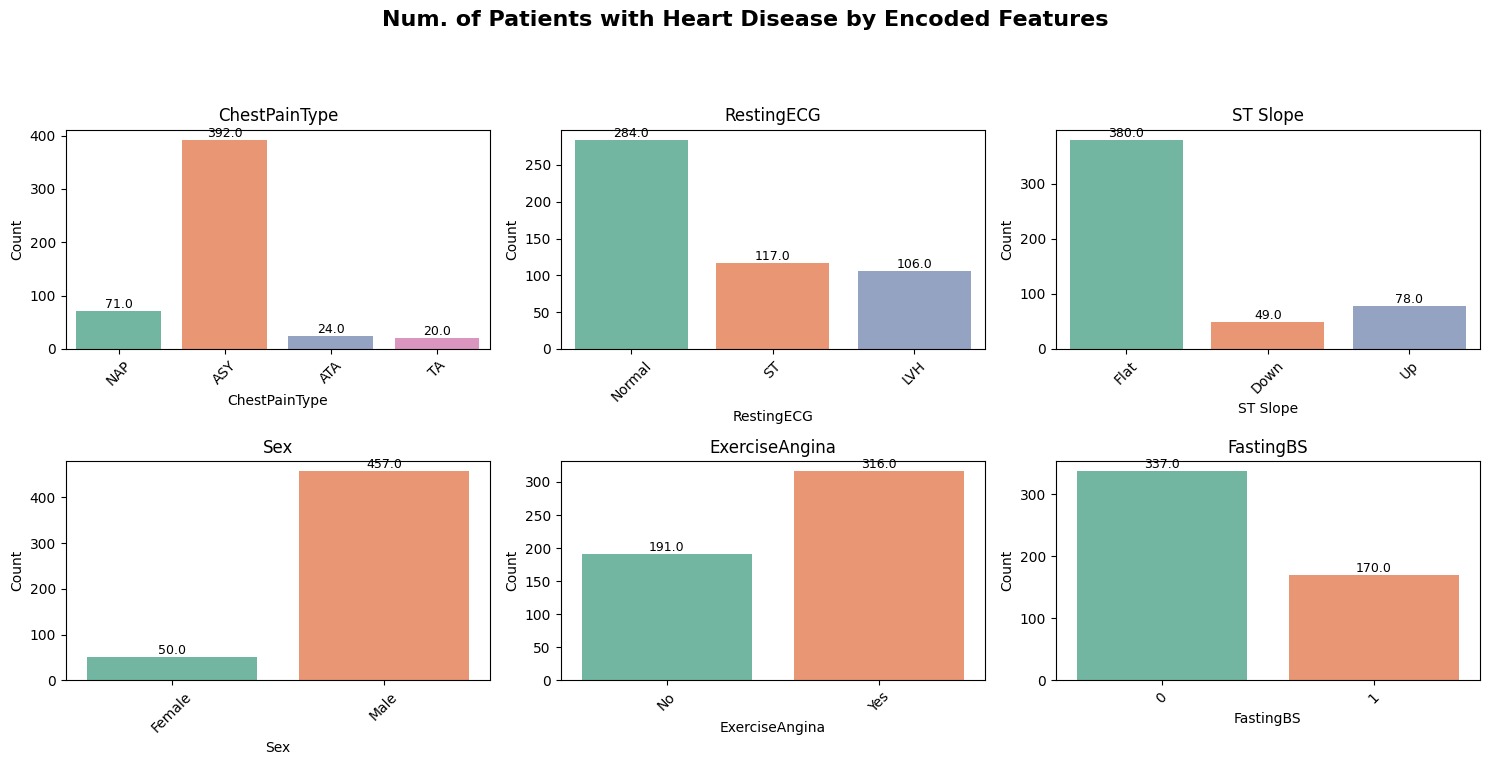

In [25]:
# Plot for patients with heart disease
plot_patient_counts(
    df_analysys, 
    df_analysys["HeartDisease"] == 1, 
    "Num. of Patients with Heart Disease by Encoded Features\n"
)

The dataset shows a reasonably balanced distribution between patients with and without heart disease.

However, there are some imbalances in the data for certain features:

* Gender: There is less data available for women.
* Age: There is a lack of data for patients under 30.

From the heatmap, it appears that MaxHR and Oldpeak are more correlated with the HeartDisease.


##### 5. Feature Engineering

Replace invalid cholesterol data with imputation from non-zero data.

In **Section 4**, the cholesterol distribution resembles a Gaussian Distribution with slight skews due to outlier data. 

Therefore to determine if the outlier greatly influences the mean or vice-versa, w can examine the mean and median values of cholesterol feature.

In [38]:
# Mean & Median Cholesterol

print("Mean Cholesterol: ", df_encoded[df_encoded["Cholesterol"] > 0]["Cholesterol"].mean())
print("Median Cholesterol: ", df_encoded[df_encoded["Cholesterol"] > 0]["Cholesterol"].median())

# Mean & Median Cholesterol for patients without heart disease

print("Mean Cholesterol for patients without Heart Disease: ", df_encoded[(df_encoded["Cholesterol"] > 0) & (df_encoded["HeartDisease"] == 0)]["Cholesterol"].mean())
print("Median Cholesterol for patients without Heart Disease: ", df_encoded[(df_encoded["Cholesterol"] > 0) & (df_encoded["HeartDisease"] == 0)]["Cholesterol"].median())

# Mean & Median Cholesterol for patients with heart disease

print("Mean Cholesterol for patients with Heart Disease: ", df_encoded[(df_encoded["Cholesterol"] > 0) & (df_encoded["HeartDisease"] == 1)]["Cholesterol"].mean())
print("Median Cholesterol for patients with Heart Disease: ", df_encoded[(df_encoded["Cholesterol"] > 0) & (df_encoded["HeartDisease"] == 1)]["Cholesterol"].median())

Mean Cholesterol:  244.6353887399464
Median Cholesterol:  237.0
Mean Cholesterol for patients without Heart Disease:  238.76923076923077
Median Cholesterol for patients without Heart Disease:  231.5
Mean Cholesterol for patients with Heart Disease:  251.06179775280899
Median Cholesterol for patients with Heart Disease:  246.0


Notice that the median value falls within the Borderline high Cholesterol level, while the mean value is in the High Cholesterol level. This discrepancy creates a challenge in selecting an appropriate value because:

Patients with cholesterol levels of 0mg are present in both groups, with and without heart disease.
Numerous studies highlight the role of cholesterol in the development of heart diseases, so arbitrarily assigning a value can impact predictions, given the correlation between cholesterol and heart disease.

I chose to use the median value to replace records with cholesterol levels of 0mg as it preserves the right-skewed distribution of cholesterol in relation to heart disease. The median value, being in the Borderline high Cholesterol level, is more neutral for predicting heart disease.

In [40]:
df_encoded.loc[df_encoded['Cholesterol'] == 0, 'Cholesterol'] = int(df_encoded[df_encoded["Cholesterol"] > 0]["Cholesterol"].median())

In [41]:
#cross check stats

df_encoded.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [50]:
# Add new feature `Cholesterol_Level`
df_encoded['Cholesterol_Level'] = pd.cut(df_encoded['Cholesterol'], bins=[0, 200, 240, 300, 1000], labels=['Normal', 'Borderline High', 'High', 'Very High'])


In [52]:
# apply one-hot encoding to the new feature
df_encoded = pd.get_dummies(df_encoded, columns=['Cholesterol_Level'], drop_first=True)

#drop the original 'Cholesterol' column
df_encoded = df_encoded.drop(columns=['Cholesterol'])

In [53]:
df_encoded.head()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Level_Borderline High,Cholesterol_Level_High,Cholesterol_Level_Very High
0,40,140,172,0.0,0,True,True,False,False,False,True,False,False,False,True,False,True,False
1,49,160,156,1.0,1,False,False,True,False,False,True,False,False,True,False,False,False,False
2,37,130,98,0.0,0,True,True,False,False,False,False,True,False,False,True,False,True,False
3,48,138,108,1.5,1,False,False,False,False,False,True,False,True,True,False,True,False,False
4,54,150,122,0.0,0,True,False,True,False,False,True,False,False,False,True,False,False,False


Now, Save the pre-proceesed dataset

In [54]:
df_encoded.to_csv("../data/heart_processed.csv", index=None)